# Introduction, Conclusion, and Sections of the NB

### INTRODUCTION
Thank you so much for taking the time to read through my Capstone project's notebook. The capstone project is the crowning achievement of the GA DSI course, and serves to exemplify the variety of skills I have learned throughout the past few months. As such, I have taken time to choose a topic that requires both a variety of skills and proves to be a creative idea. Thus, I have chosen my Capstone project to be a personality based subreddit recommendation engine. 

What prompted this capstone idea was the grave of my previous capstone idea, which was determining what news articles would qualify as being significant to the stock market. I found that the approach I wanted to take for that capstone idea would be unsuccessful due to the nature of my methodology. I was going to analyze thousands of articles posted to reddit.com and their associated comments relative to stock market movement. I found, though, through trial, error, and classroom discussions that there was an abundance of issues that would be unresolvable due to the inherent randomness and complexity of the markets. 

With the frustration of no longer having a viable project, I looked to scavenge what I could from my work. Perhaps the most important code of my work was the subreddit API scraping and cleaning code. The scraping code was simple to write, but the cleaning code in my mind would prove to be an invaluable resource should I choose to reuse my code. Thus, I started thinking of ideas that would allow me to reuse this code, as there was so much information available from the data.

The idea I settled on was to model the personalities of subreddits and associated users to generate an ensembled search engine for subreddit recommendation. The idea was to scrape the comments and links over tens of thousands of posts spanning hundreds of subreddits to identify unique personalities amongst the subreddits and users. From this scraped and inferred information, I would be able to identify key commonalities in user preferences and subreddit personalities, which would allow me to create a euclidian based coordinate-system to identify the most similar subreddits and users. I would ensemble the two by:

* Requesting the subscribed subreddits of a participant
* Identifying the users with similar preferences from my user-subreddit list
* Generating a list of subreddits found in other users' data, but not in the participant's data
* Determining which of the subreddits within the generated list was most similar to the participant's list
* Returning that most similar subreddit

From this system, I would be able to tell a participant which subreddit they would really enjoy.

However, I encountered a major problem whilst trying to complete these tasks: the usernames returned from the API were hashed user id's, not usernames. So, the user id's represented in my data were a one-way key to the real usernames, which I had no way of getting, unless I chose to scrape the posts manually. I decided not to do this due to reddit's extremely strict webscraping and API rules. If I were to ping reddit more than 30 times a minute or if I didn't supply the proper credentials to my requests, I would be perma-banned from the site. Due to this risk, I chose to proceed without the user data, and to create a model consisting solely of subreddit personality information.

### CONCLUSION
Overall, this project was successful. A project like this consists of three parts; scraping the data, categorizing the data, and modeling the data. The first two phases were straightforward with clear hurdles, however it was unexpected to me at the time as to how difficult the modeling phase would be. I had done unsupervised learning via KMeans successfully before this project, so I expected that with some model tweaking that I would be able to create appropriate groupings. What I found was that the categorizations of the data proved to be too correlated to create unique groupings. In my efforts to eliminate redundency and to infer information from my categorizations, I found that the information remained jumbled and the model became finicky. I tried to overcome these difficulties through a series of normalization and scaling procedures, but only retained minor positive changes to the clustering.

Despite this perceived failure of being unable to create acceptable groupings and recommendation, I would state that this learning experience was successful. For one, I've practiced some of the more advanced and supplementary topics of the course in addition to pursuing a creative project choice. I've learned that categorization by the methodology I have used is not enough to create a successful model, and that more data is not necessarily better. While these might seem like obvious lessons, it has been extremely well emphasized in this project through my attempts to increase my word categorization database while failing to pursue additional methodologies to solidify my model's accuracy. 

Continuing on, what is accuracy in this context? How can one possibly group together or rate the accuracy of something like this. Based upon my methodology, the recommended subreddits both have similar topics of conversation and treat the topics of conversation similarly. I tried using a split-approach to the personality creation; which consisted of generation of ideology and interests. I did this by creating lists of varying ideologies and interests that I felt were important to reddit, but I struggled with understanding what my predictions were. It is super difficult to know whether the predictions are correct or incorrect while being impartial and 'knowing' everything about each subreddit. There were points at which I could guess whether subreddits were similar or not; so this approach definitely had its difficulties.

In this case where my model accuracy is not what I wished it to be, one needs to ask to what end does one tinker with parameters to generate appropriate results. I would state that when groupings have achieved an accuracy where 60% of the group is similar, that the model has reached a tolerable level of accuracy. 60% is not a very large percentage, but keep in mind that this is only the first iteration. I'm not sure whether more will follow, but as layers are added to the model, the mixed clusters will hopefully unmix into acceptable groupings. Furthermore, 60% is a completely subjective number. It might turn out that the model is bang on, but it really depends upon who is judging the predictions.

### SECTIONS:
* Reddit Scraping Code
* Word-List Scraping Code
* Data Cleaning
* Creating Categorical Variables
* Scaling and Normalization For Clustering

# Reddit Scraping Code

In [ ]:
"""I used the documentation in addition to the following video for help on this webscraping/API process:
    https://www.youtube.com/watch?v=yexxcrPC7U8 """

import requests
import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import praw
import json
import time
import datetime
import re
import selenium
import time
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support.select import Select
from IPython.core.display import HTML

driver = webdriver.PhantomJS(executable_path='/Users/thomas/Downloads/phantomjs-2.1.1-macosx/bin/phantomjs')
driver.set_window_size(300, 200) 

%matplotlib inline

I used http://redditmetrics.com/tophttp://redditmetrics.com/top to find the top rated subreddits, which were the ones I would be using.

In [ ]:
def get_replies(comment, reply_list):
    """ recursive function that goes through the reply tree of a comment """
    reply_list.append({"id": comment.id, "comment": comment.body})
    if len(comment._replies) > 0:
        for r in comment._replies:
            get_replies(r, reply_list)
    return reply_list

In [ ]:
df=pd.read_csv('Top Subreddits.csv')
subreddit_list=[x for x in df['Reddit']]

###
    # Number_of_Posts states how many posts to get; refer to posts = r.get... (line 32)
Number_of_Posts=100
    # Number_of_Comments states how many of top comments should be expanded to include children comments (line 46)
Number_of_Comments=4

###
for i in range(len(subreddit_list)):
    print 
    print i
    print 
    count=0
    current_time=time.time()
    print "Starting Collection from "+subreddit_list[i]
    subreddit_posts={}
    json_name='/Users/thomas/GA-DSI/projects/projects-capstone/Work 2, Personalities/Subreddit Data/'\
                        +subreddit_list[i][3:]+'.json'
        
        ### You would replace 'xxx' with your reddit username
    info_for_request='get top '+str(Number_of_Posts)+' posts w/ top '+str(Number_of_Comments)+\
                        ' comments and children comments from '+subreddit_list[i]+\
                        "for Capstone project at General Assembly's DSI program by User: xxx"
    r = praw.Reddit(user_agent=info_for_request)
        ### You would replace ('xxx', 'xxx') with ('username', 'password')
    r.login('xxx', 'xxx',disable_warning=True)
            # Can replace 'get_top_from_year' with get_'x'_from_'y'. The from_'y' argument is optional, and will
            # default to 24 hours. We can specify whether we want week, month, year, or all_time for the 'y' field.
            # We can specify whether we want, top, hot, controversial, or new in the 'x' field
    posts = r.get_subreddit(subreddit_list[i][3:]).get_top_from_year(limit=Number_of_Posts)
    for post in posts:
        count+=1
        post_comments=[]
        head_comments=[]
        
        post_id=post.id
        post_title=post.title
        post_score=post.score
        post_url=post.url
        post_date=datetime.datetime.fromtimestamp(post.created)
#         post_author=post.author
        
        submission = r.get_submission(submission_id=post_id)
        submission.replace_more_comments(limit=Number_of_Comments, threshold=0)
        for comment in submission.comments:
#             """ loops through all comments to submission """
            x = []  # array that holds the comment and all replies
            # get all replies and append it to our array for writing to file
            post_comments.append(get_replies(comment, x))
        for comment in submission.comments:
            head_comments.append([comment.score,comment.body])
            
        if count%20==0:
            print "  Finished",count,"Out of",Number_of_Posts
            print "    Time Elapsed:",(time.time()-current_time)/60.,"minutes"
        subreddit_posts[post_id]=[post_title,str(post_date),post_score,post_url,head_comments,post_comments]
    with open(json_name, 'w') as fp:
        json.dump(subreddit_posts, fp)
    
    print "Time Spent:",(time.time()-current_time)/60.,"minutes"
    print "Finished Collection from r/"+subreddit_list[i][3:]
    print
    

# Word-List Scraping Code 
### (Pardon the mess, I grouped all of this code together)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from nltk.stem import SnowballStemmer,PorterStemmer
from stemming import lovins,porter2,paicehusk
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import stop_words
import pprint
import re
import time
import spacy
import datetime
import requests
import BeautifulSoup
import json
%matplotlib inline

#### I also used a website called http://www.words-to-use.com/ for word lists. I dragged and dropped those words into corresponding csv's.

In [ ]:
url='http://sexetc.org/sex-ed/sex-terms/?pageNum=100'
r=requests.get(url)
soup=BeautifulSoup.BeautifulSoup(r.text)
soup=soup.findAll('article',{'class':'resource-container fl'})
sexual_terms=[x.a.text for x in soup]

url='https://en.wikipedia.org/wiki/Wikipedia:List_of_controversial_issues'
r=requests.get(url)
soup=BeautifulSoup.BeautifulSoup(r.text)
soup=soup.findAll('div',{'class':'div-col columns column-count column-count-2'})
controversial_terms=[]
for i in range(len(soup)):
    controversial_terms.extend([x.text for x in soup[i].findAll('li')])
    
url='http://www.conservapedia.com/Essay:Best_New_Conservative_Words'
r=requests.get(url)
soup=BeautifulSoup.BeautifulSoup(r.text)
conservative_terms=[]
for i in range(1,len(soup.findAll('table')[1].findAll('tr'))):
    conservative_terms.append(soup.findAll('table')[1].findAll('tr')[i].td.text)
    
technical_terms=[]
url='http://www.math.utah.edu/~wisnia/glossary.html'
r=requests.get(url)
soup=BeautifulSoup.BeautifulSoup(r.text)
for x in soup.findAll('h3'):
    technical_terms.append(x)
    
url='https://en.wikipedia.org/wiki/Glossary_of_physics'
r=requests.get(url)
soup=BeautifulSoup.BeautifulSoup(r.text)
soup=soup.findAll('ul')
for x in soup[1:-37]:
    for y in x.findAll('a'):
        technical_terms.append(y.text)
        
url='https://en.wikipedia.org/wiki/Glossary_of_chemistry_terms'
r=requests.get(url)
soup=BeautifulSoup.BeautifulSoup(r.text)
soup=soup.findAll('ul')
for x in soup[3:-17]:
    for y in x.findAll('a'):
        technical_terms.append(y.text)
        
url='https://en.wikipedia.org/wiki/Glossary_of_biology'
r=requests.get(url)
soup=BeautifulSoup.BeautifulSoup(r.text)
soup=soup.findAll('ul')
for x in soup[2:-15]:
    for y in x.findAll('a'):
        technical_terms.append(y.text)
        
url='https://en.wikipedia.org/wiki/Glossary_of_philosophy'
r=requests.get(url)
soup=BeautifulSoup.BeautifulSoup(r.text)
soup=soup.findAll('a')
for x in soup[70:-87]:
    technical_terms.append(x.text)
    
url='http://members.cruzio.com/~zdino/psychology/political.science.glossary.htm'
r=requests.get(url)
soup=BeautifulSoup.BeautifulSoup(r.text)
soup=soup.findAll('dl')
for x in soup:
    for y in x.findAll('a'):
        if len(y.text)>1:
            technical_terms.append(y.text)
            
url='http://www.hermes-press.com/psgloss1.htm'
r=requests.get(url)
soup=BeautifulSoup.BeautifulSoup(r.text)
soup=soup.findAll('p')
for x in soup:
    for y in x.text.split('.'):
        for z in y.split('-'):
            if len(z)<15 and len(z)>5:
                if 'U' not in z:
                    z=z.strip(')').strip(', ').strip('(')
                    technical_terms.append(z)
                    
theological=[]
url='http://www.rebecca-writes.com/theological-terms-in-ao/'
r=requests.get(url)
soup=BeautifulSoup.BeautifulSoup(r.text)
for x in soup.findAll('a')[22:-2]:
    theological.append(x.text)
    
sports=[]
url='https://en.wikipedia.org/wiki/Glossary_of_American_football'
r=requests.get(url)
soup=BeautifulSoup.BeautifulSoup(r.text)
for x in soup.findAll('dt')[:-1]:
    sports.append(x.text)
    
url='http://www.socceramerica.com/glossary/'
r=requests.get(url)
soup=BeautifulSoup.BeautifulSoup(r.text)
for x in soup.findAll('strong')[19:]:
    sports.append(x.text)
    
url='https://en.wikipedia.org/wiki/Glossary_of_professional_wrestling_terms'
r=requests.get(url)
soup=BeautifulSoup.BeautifulSoup(r.text)
for x in soup.findAll('dl')[::2]:
    sports.append(x.text)
    
url='http://wrestling.isport.com/wrestling-guides/wrestling-glossary/?key=1831'
r=requests.get(url)
soup=BeautifulSoup.BeautifulSoup(r.text)
for x in soup.findAll('strong'):
    sports.append(x.text)
    
url='https://en.wikipedia.org/wiki/Glossary_of_motorsport_terms'
r=requests.get(url)
soup=BeautifulSoup.BeautifulSoup(r.text)
for x in soup.findAll('dt'):
    sports.append(x.text)
    
url='https://en.wikipedia.org/wiki/Glossary_of_basketball_terms'
r=requests.get(url)
soup=BeautifulSoup.BeautifulSoup(r.text)
for x in soup.findAll('dt'):
    if '&#160;' in x.text:
        sports.append(x.text[:-6])
    else:
        sports.append(x.text)
        
fitness=[]
url='http://www.bodybuilding.com/fun/glossam.htm'
r=requests.get(url)
soup=BeautifulSoup.BeautifulSoup(r.text)
for x in soup.findAll('b'):
    fitness.append(x.text)
    
url='http://www.bodybuilding.com/fun/glossnz.htm'
r=requests.get(url)
soup=BeautifulSoup.BeautifulSoup(r.text)
for x in soup.findAll('strong'):
    fitness.append(x.text)
    
anarchy=[]
url='https://en.wikipedia.org/wiki/Glossary_of_anarchism'
r=requests.get(url)
soup=BeautifulSoup.BeautifulSoup(r.text)
for x in soup.findAll('dfn'):
    anarchy.append(x.text)
    
marxism=[]
for letter in 'abcdefghijklmnopqrstuvwxyz':
    baseurl='https://www.marxists.org/glossary/'+letter+'.htm'
    r=requests.get(baseurl)
    soup=BeautifulSoup.BeautifulSoup(r.text)
    for x in soup.findAll('a'):
        if '#8212;' in x.text:
            x.text.replace('#8212;',"-")
        if '&#8217;' in x.text:
            x.text.replace('&#8217;',"'")
        if '&#8211;' in x.text:
            x.text.replace('&#8211;',"'")
        marxism.append(x.text)
        
drugs=[]
for letter in 'abcdefghijklmnopqrstuvwxyz':
    url='http://www.noslang.com/drugs/dictionary/'+letter+'/'
    r=requests.get(url)
    soup=BeautifulSoup.BeautifulSoup(r.text)
    for x in soup.findAll('b')[5:]:
        drugs.append(x.text)
        
gaming=[]

url='http://www.theaveragegamer.com/terminology/'
r=requests.get(url)
soup=BeautifulSoup.BeautifulSoup(r.text)
for x in soup.findAll('strong'):
    gaming.append(x.text[:-1])
    
url='https://en.wikipedia.org/wiki/Category:Video_game_terminology'
r=requests.get(url)
soup=BeautifulSoup.BeautifulSoup(r.text)
for x in soup.findAll('a')[4:]:
    x=x.text
    gaming.append(x)
    
url='http://videogamecritic.com/extras/glossary.htm'
r=requests.get(url)
soup=BeautifulSoup.BeautifulSoup(r.text)
for x in soup.findAll('b')[:-1]:
    gaming.append(x.text)
    
environmental=[]
url='http://www.theconscientioushome.net/glossary.php'
r=requests.get(url)
soup=BeautifulSoup.BeautifulSoup(r.text)
for x in soup.findAll('a')[4:-26]:
    environmental.append(x.text)
    
url='https://en.wikipedia.org/wiki/Glossary_of_environmental_science'
r=requests.get(url)
soup=BeautifulSoup.BeautifulSoup(r.text)
for x in soup.findAll('a')[36:-134]:
    if '[' not in x.text:
        if 'edit' not in x.text:
            environmental.append(x.text)
            
weirdo=[]
url='http://imgur.com/gallery/c4oKNNO'
r=requests.get(url)
soup=BeautifulSoup.BeautifulSoup(r.text)
for x in soup.findAll('div',{'class':'post-image-description'})[0]:
    x=x.split('\n')
    for y in x[1:-5]:
        weirdo.append(y.split(' =')[0])
        
vulgar_terms=[]
alpha="abcdefghijklmnopqrstuvwxyz"
for letter in alpha:
    url='http://www.noswearing.com/dictionary/'+letter
    r=requests.get(url)
    soup=BeautifulSoup.BeautifulSoup(r.text)
    for x in soup.findAll('td')[3].findAll('a'):
        vulgar_terms.append(x['name'])
        
liberal_string="""Ally: Someone who advocates for and supports members of a community other than their own.
Reaching across differences to achieve mutual goals.
Androgynous: Someone who reflects an appearance that is both masculine and feminine, or who
appears to be neither or both a boy and a girl.
Asexual: Having no evident sex or sex organs. In usage, may refer to a person who is not sexually
active, or not sexually attracted to other people.
Bias: Prejudice; an inclination or preference, especially one that interferes with impartial judgment.
Bigendered: Refers to those who feel they have both a male and a female side to their
personalities. Some “bigendered” people crossdress, others may eventually have a sex-change
operation, others may do neither.
Biphobia: The irrational fear and intolerance of people who are bisexual.
Birth Sex/Sex: The sex one is assigned at birth due to the presence of whatever external sex
organs. Once this determination is made, it becomes a label used for raising the child in either one
gender image or other (either as male or female).
Bisexual: Also bi. A person who is attracted to two sexes or two genders, but not necessarily
simultaneously or equally. [This used to be defined as a person who is attracted to both genders or
both sexes, but since there are not only two sexes (see intersex and transsexual) and there are not
only two genders (see transgender), this definition is inaccurate.]
Coming out: To recognize one’s sexual orientation, gender identity, or sex identity, and to be
open about it with oneself and with others.
Cross Living: Living full-time in the preferred gender image, opposite to one’s assigned sex at
birth, generally in preparation for a sex change operation.
Direction: Refers to the way in which one is crossing the gender line. Masculine/Male to
Feminine/Female (MTF) is one way; Feminine/ Female to Masculine/Male (FTM) is another. 
 2
Discrimination: The act of showing partiality or prejudice; a prejudicial act.
Domestic Partner: One who lives with their beloved and/or is at least emotionally and financially
connected in a supportive manner with another. Another word for spouse, lover, significant other,
etc.
Dominant culture: The cultural values, beliefs, and practices that are assumed to be the most
common and influential within a given society.
Drab: Means dressing as a boy, referring to men’s clothes or wearing men’s clothes; is used
mainly by gender benders and cross-dressers of both directions. Drag: The act of dressing in
gendered clothing as part of a performance. Drag Queens perform in highly feminine attire. Drag
Kings perform in highly masculine attire. Drag may be performed as a political comment on
gender, as parody, or simply as entertainment. Drag performance does not indicate sexuality,
gender identity, or sex identity.
Family: Colloquial term used to identify other LGBTIQ community members. For example, an
LGBTIQ person saying, “that person is family” often means that the person they are referring to is
LGBTIQ as well.
Family of choice (chosen family): Persons or group of people an individual sees as significant in
his or her life. It may include none, all, or some members of his or her family of origin. In addition,
it may include individuals such as significant others, domestic partners, friends, and coworkers.
FTM: female-to-male (transvestite or transsexual).
Gay: Men attracted to men. Colloquially used as an umbrella term to include all LGBTIQ people.
Gender: 1) A socially constructed system of classification that ascribes qualities of masculinity
and femininity to people. Gender characteristics can change over time and are different between
cultures. Words that refer to gender include: man, woman, transgender, masculine, feminine, and
gender queer. 2) One’s sense of self as masculine or feminine regardless of external genitalia. 3)
Refers to the way we perceive certain things to be masculine or feminine. These things need not be
human; for example, in the language of many cultures, cups are feminine, and pencils masculine.
[Traditionally, we tend to associate gender – that is, masculine and feminine meanings – with
features that include: · physical sex or genitals; · other physical features (for example height,
weight, and body hair); · sexual orientation (gay men are often considered more feminine than their
heterosexual counterparts, and lesbian women more masculine); and · behavior or dress (a man
who cries may be considered unmanly, a woman who is aggressive or wears a suit-coat and slacks
may be considered unfeminine).]
Gender Binary System: A system of oppression that requires everyone to be raised either male or
female, and masculine or feminine. Eliminates 5 the possibility for other gender expressions, and
gives power to people whose genders do not break gender norms at the expense of transgender and
intersex people. Manifests itself as transphobia. 
 3
Gender Characteristics: Refers to the primary and secondary sexual physical characteristics like
height, weight, and body hair, over which the individual has no control and which do not constitute
part of their expression or identification. Examples might include a man with a high voice, a
woman with prominent facial hair, or a person with anomalous genitalia (more correctly referred to
as “intersex”).
Gender Conformity: When your gender identity and sex “match” (i.e. fit social norms). For
example, a male who is masculine and identifies as a man.
Gender Expression/Gender Image: The way one presents oneself to the world, as either
masculine or feminine, or both or neither. This can include dress, posture, vocal inflection, and
other behavior.
Gender Identity: 1) “Gender identity” refers to an individual’s self-awareness or fundamental
sense of themselves as being masculine or feminine, and male or female. The phrase “gender
identity” originated as a psychiatric term, and is commonly used to protect transsexual or
transgender employees, particularly those who transition from one sex to another on the job. 2)
The gender that a person sees oneself as. This can include refusing to label oneself with a gender.
Gender identity is also often conflated with sexual orientation, but this is inaccurate. Gender
identity does not cause sexual orientation. For example, a masculine woman is not necessarily a
lesbian.
Genderism: Holding people to traditional expectations based on gender, or punishing or excluding
those who don’t conform to traditional gender expectations.
Gender-neutral: Nondiscriminatory language to describe relationships—e.g. “spouse” and
“partner” are gender-neutral alternatives to the gender-specific words “husband,” “wife,”
“boyfriend” and “girlfriend.”
Gender Queer (or Genderqueer): A person who redefines or plays with gender, or who refuses
gender altogether. A label for people who bend/break the rules of gender and blur the boundaries.
Gender Role: How “masculine” or “feminine” an individual acts. Societies commonly have norms
regarding how males and females should behave, expecting people to have personality
characteristics and/or act a certain way based on their biological sex.
Gender Stereotypes: “Gender stereotypes” are the patterns or mental templates for what we
expect members of each sex to be. For instance, the stereotype for males frequently includes being
tall, muscular, hirsute, solitary, and impassive. For females it might include being small, weak,
social, sensitive, and emotional.
Gender-variant / Gender non-conforming: Displaying gender traits that are not normatively
associated with their biological sex. “Feminine” behavior or appearance in a male is gender-variant
as is “masculine” behavior or appearance a female. Gender-variant behavior is culturally specific.
 4
Genetic: refers to the chromosomal endowment of the individual, with emphasis on the sex
chromosomes (XX in women and XY in men).
Hate crime: Hate crime legislation often defines a hate crime as a crime motivated by the actual or
perceived race, color, religion, national origin, ethnicity, gender, disability, or sexual orientation of
any person.
Heterosexism: Assuming every person to be heterosexual therefore marginalizing persons who do
not identify as heterosexual. It is also believing heterosexuality to be superior to homosexuality
and all other sexual orientations.
Heterosexuality: Sexual, emotional, and/or romantic attraction to a sex other than your own.
Commonly thought of as “attraction to the opposite sex” but since there are not only two sexes (see
intersex and transsexual), this definition is inaccurate.
Heterosexual Privilege: Benefits derived automatically by being (or being perceived as)
heterosexual that are denied to homosexuals, bisexuals, and queers.
Homophobia: The irrational fear and intolerance of people who are homosexual or of homosexual
feelings within one’s self. This assumes that heterosexuality is superior.
Homosexuality: Sexual, emotional, and/or romantic attraction to the same sex.
Institutional Oppression: Arrangement of a society used to benefit one group at the expense of
another through the use of language, media education, religion, economics, etc.
Internalized Oppression: The process by which an oppressed person comes to believe, accept, or
live out the inaccurate stereotypes and misinformation about their group.
Intersex: Intersexuality is a set of medical conditions that feature congenital anomaly of the
reproductive and sexual system. That is, intersex people are born with “sex chromosomes,”
external genitalia, or internal reproductive systems that are not considered “standard” for either
male or female. The existence of intersexuals shows that there are not just two 10 sexes and that
our ways of thinking about sex (trying to force everyone to fit into either the male box or the
female box) is socially constructed. About 1 in 2000 infants born are at risk for intersex genital
mutilation. An even higher proportion of the population is intersex in some way. This word
replaces “hermaphrodite”, which is generally considered impolite and/or derogatory.
In the closet: Keeping one’s sexual orientation and/or gender or sex identity a secret.
Invisible minority: A group whose minority status is not always immediately visible, such as
some disabled people and LGBTIQ people. This lack of visibility may make organizing for rights
difficult.
Lambda: The Gay Activist Alliance originally chose the lambda, the Greek letter “L”, as a symbol
in 1970. Organizers chose the letter “L” to signify liberation. The word has become a way of 
 5
expressing the concept “lesbian and gay male” in a minimum of syllables and has been adopted by
such organizations as Lambda Legal Defense and Education Fund.
Lesbian: A woman attracted to women.
LGBTIQ: Lesbian, Gay, Bisexual, Transgender, Intersex, Queer.
Male supremacy: A system of oppression that gives power to men and values masculinity, at the
expense of women and femininity.
Marginalized: Excluded, ignored, or relegated to the outer edge of a group/society/community.
Men who have sex with men (MSM): Men who engage in same-sex behavior, but who may not
necessarily self-identify as gay.
MTF: Male to Female (transvestite or transsexual).
Non-Op: Refers to transsexuals who seek sex reassignment through hormones and who crosslive,
but stop just short of surgery. Some have concerns about major surgery, which is not always
successful, others are unable to pay for the expensive procedures surgery would entail, and still
others feel that they are complete without the surgery.
On T: When a FTM takes the hormone testosterone.
Oppression: Results from the use of institutional power and privilege where one person or group
benefits at the expense of another. Oppression is the use of power and the effects of domination.
Out or Out of the closet: Refers to varying degrees of being open about one’s sexual orientation
and/or sex identity or gender identity.
Pansexual: A person who is fluid in sexual orientation and/or gender or sex identity.
Pass: Means to be in your preferred gender image and to be able to do so convincingly in the eyes
of those around you, for example an FTM or cross dresser or drag king who looks like a man and
not like a woman.
Polyamory: The practice of having multiple open, honest love relationships.
Post-Op: A transsexual who has had their sex change operation and now has the physical anatomy
which mimics that of the sex they have transitioned to.
(Institutional) Power: Means control, access and influence. In U.S. society, power means having
control of and access to ruling institutions; freedom from the threat of being questioned or
reprimanded for wrong-doing; and the ability to define standards and norms.
Present: Refers to gender expression and the process of reflecting ones gender to others; someone
who is bigendered may present as female one day and male the next. 
 6
Pre-Op: A transsexual who has not yet had their sex change operation(s) but who ‘plans on having
it/them.
Privilege: Means a right, a favor, an immunity or an advantage specially granted to one individual
or group and withheld from another.
Queer: 1) An umbrella term used to refer to all LGBTIQ people. 2) A political statement, as well
as a sexual orientation, which advocates breaking binary thinking and seeing both sexual 14
orientation and gender identity as potentially fluid. 3) A simple label to explain a complex set of
sexual behaviors and desires. For example, a person who is attracted to multiple genders may
identify as queer. Many older LGBT people feel the word has been hatefully used against them for
too long and are reluctant to embrace it. 4) Originally a synonym for “odd”, this word became a
derogatory expression for gays in the 20th Century. Even though many people still use “queer” as
an anti-gay epithet, a movement emerged in the 1980s that calls itself queer. Used in this way,
queer means sexually dissident, but not necessarily gay. Many gays, transsexuals, bisexuals and
even heterosexuals whose sexuality doesn’t fit into the cultural standard of monogamous
heterosexual marriage have adopted the “queer” label. In academic circles, the term “queer” often
refers to the approaches and sensibilities of queer theory.
Racism: Discrimination against people of color that results from the white supremacy system of
domination. Racism is prejudice plus institutional power.
Rainbow Flag: The Rainbow Freedom Flag was designed in 1978 by Gilbert Baker to designate
the great diversity of the LGBTIQ community. It has been recognized by the International Flag
Makers Association as the official flag of the LGBTIQ civil rights movement.
Self-Identify: Refers to the process of people choosing with which identifying terms/groups they
identify. (E.g. Someone could self-identify as male, female or bigendered, multi-racial, etc.)
Sex: Refers to a person based on their anatomy (external genitalia, chromosomes, and internal
reproductive system). Sex terms are male, female, transsexual, and intersex. Sex is biological,
although social views and experiences of sex are cultural.
Sex Identity: The sex that a person sees themselves as. This can include refusing to label oneself
with a sex.
Sexism: Discrimination against women that results from the male supremacy system of oppression.
Sex-Reassignment Surgery (SRS): Sex change operation.
Sexual minority: 1) Refers to members of sexual orientations or who engage in sexual activities
that are not part of the mainstream. 2) Refers to members of sex groups that do not fall into the
majority categories of male or female, such as intersexuals and transsexuals. 
 7
Sexual Orientation: The deep-seated direction of one’s sexual (erotic) attraction. It is on a
continuum and not a set of absolute categories, sometimes referred to as affection orientation or
sexuality.
Socialized: Refers to the “training” process that takes place once birth sex is determined/decided
upon. People whose birth sex is female are “socialized” as women although they may or may not
self-identify as women.
SRS: Acronym for Sexual Reassignment Surgery, the surgery done by transsexuals to make their
bodies and their sex identity match.
Stereotype: An exaggerated oversimplified belief about an entire group of people without regard
for individual differences.
Straight: Person who is attracted to a gender other than their own. [Commonly thought of as
“attraction to the opposite gender,” but since there are not only two genders (see transgender),
this definition is inaccurate.]
Systems of oppression: Interlocking societal, economic, moral, and religious values that keep
many groups of people down to ensure the power and advantage of a few groups or one group of
people. Some systems of oppression in the US and Europe include: heterosexism, male supremacy,
white supremacy and the gender binary system.
Trans Female/Woman: A male-to-female transition (MTF). [The medical literature tends to use
the extremely demeaning term “male transsexual” to mean the same thing. Note that you can tell
the preferred form is in use when the gender word comes after the “T” word.]
Transgender: 1) Transgender (sometimes shortened to trans or TG) people are those whose
psychological self (“gender identity”) differs from the social expectations for the physical sex they
were born with. To understand this, one must understand the difference between biological sex,
which is one’s body (genitals, chromosomes, ect.), and social gender, which refers to levels of
masculinity and femininity. Often, society conflates sex and gender, viewing them as the same
thing. But, gender and sex are not the same thing. Transgender people are those whose
psychological self (“gender identity”) differs from the social expectations for the physical sex they
were born with. For example, a female with a masculine gender identity or who identifies as a man.
2) An umbrella term for transsexuals, cross-dressers (transvestites), transgenderists, gender queers,
and people who identify as neither female nor male and/or as neither a man or as a woman.
Transgender is not a sexual orientation; transgender people may have any sexual orientation. It is
important to acknowledge that while some people may fit under this definition of transgender, they
may not identify as such.
Transgenderist: A person who lives either full time, or most of the time, in a gender role different
than the role associated with their biological or chromosomal sex (a gender nonconformist).
Transition: A complicated, multi-step process that can take years as transsexuals align their
anatomy with their sex identity; this process may ultimately include sex reassignment surgery
(SRS). 
 8
Trans Man/Male: A female-to-male transition (FTM). [The medical literature tends to use the
extremely demeaning term “female transsexual” to mean the same thing. Note that you can tell the
preferred form is in use when the gender word comes after the “T” word.]
Transphobia: 1) Discrimination, fear or hatred of people who blur traditional gender lines that
results from the gender binary system. Often comes from one’s own insecurity about being a “real
man,” or a “real woman.” 2) Fear or hatred of transgender people; transphobia is manifested in a
number of ways, including violence, harassment and discrimination.
Transsexual: Refers to a person who experiences a mismatch of the biological sex they were born
as and the biological sex they identify as. A transsexual sometimes undergoes medical treatment to
change his/her physical sex to match his/her sex identity through hormone treatments and/or
surgically. [Transexuals are included in the umbrella term transgender, but not all transgendered
people are transsexual. See also gender, sex, transgender.]
Transvestite/Cross Dresser: Individuals who regularly or occasionally wear the clothing socially
assigned to a gender not their own, but are usually comfortable with their anatomy and do not wish
to change it (i.e. they are not transsexuals). Cross-dresser is the preferred term for men who enjoy
or prefer women’s clothing and social roles. Contrary to popular belief, the overwhelming majority
of male cross-dressers identify as straight and often are married. Very few women call themselves
cross dressers.
Triangle: A symbol of remembrance. Gay men in the Nazi concentration camps were forced to
wear the pink triangle as a designation of being homosexual. Women who did not conform to
social roles, often believed to be lesbians, had to wear the black triangle. The triangles are worn
today as symbols of freedom, reminding us to never forget. """

liberal_terms=[]
for x in liberal_string.split('\n'):
    if len(x.split(":"))>1:
        liberal_terms.append(x.split(":")[0])
        
url='http://bellebrita.com/2014/08/feminism-101-learning-lingo/'
r=requests.get(url)
soup=BeautifulSoup.BeautifulSoup(r.text)
for x in soup.findAll('p')[12:-44]:
    x=x.text
    x=x.split(':')[0]
    liberal_terms.append(x)
    
created_list=[liberal_terms,environmental,gaming,drugs,marxism,anarchy,fitness,sports,theological,technical_terms,\
    conservative_terms,controversial_terms,weirdo,vulgar_terms,sexual_terms]

for x,y in zip(created_list,['liberal_terms','environmental','gaming','drugs','marxism','anarchy','fitness','sports',\
            'theological','technical_terms','conservative_terms','controversial_terms','weirdo','vulgar_terms',\
                            'sexual_terms']):
    json_name='/Users/thomas/GA-DSI/projects/projects-capstone/Work 2, Personalities/Key Terms Lists/'+y+'.json'
    df=pd.DataFrame(x,columns=['Terms'])
    json_file=df.to_json()
    with open(json_name, 'w') as fp:
        json.dump(json_file, fp)

# Data Cleaning

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import pprint
import spacy
import matplotlib.pyplot as plt
import time
import nltk
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier as KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, silhouette_score,classification_report
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV, LinearRegression
from sklearn import cluster, datasets, preprocessing, metrics
%matplotlib inline

# Create the categorical variables

2 Ways:
* By predetermined categories
* By Bag of Words


## Comb through the category lists and remove any non-exclusive words and repeated words

### We read in our category lists here

In [89]:
category_lists=["aggression.csv", "anarchy.json", "animals.csv", "art_and_literature.csv", "cars.csv", 
                "companies.csv",\
                "conservative_terms.json", "controversial_terms.json", "drugs.json", "eco_friendly.csv",\
                "environmental.json", "feminine_terms.csv", "fitness.json", "gaming.json", "liberal_terms.json",\
                "marxism.json", "music_and_television.csv", "outdoors_words.csv", "romantic_words.csv",\
                "sadness_sorry.csv","sentiment_pos.csv","sentiment_neg.csv", "sentiment_neutral.csv", \
                "sexual_terms.json", "sports.json", "technical_terms.json", \
                "theological.json", "video_games.csv", "vulgar_terms.json", "weirdo.json"]
category_lists2=["aggression.csv", "animals.csv", "art_and_literature.csv", "cars.csv", "companies.csv",\
                "conservative_terms.json", "controversial_terms.json", "drugs.json", "eco_friendly.csv",\
                "environmental.json", "feminine_terms.csv", "fitness.json", "gaming.json", "liberal_terms.json",\
                "marxism.json", "music_and_television.csv", "outdoors_words.csv", "romantic_words.csv",\
                "sadness_sorry.csv","sentiment_pos.csv","sentiment_neg.csv", "sentiment_neutral.csv", \
                "sexual_terms.json", "sports.json", "technical_terms.json", \
                "theological.json", "video_games.csv", "vulgar_terms.json", "weirdo.json"]
base_extension="/Users/thomas/GA-DSI/projects/projects-capstone/Work 2, Personalities/Key Terms Lists/"

In [7]:
# Here we are just reading in the category word lists into a list. Out put is a list of category lists.
i=0
category_word_list=[]
for i in range(len(category_lists)):
    extension=base_extension+category_lists[i]
    if category_lists[i][-3:]=='csv':
        df=pd.read_csv(extension)
        words=[word for word in df.iloc[:,0]]
    elif category_lists[i]=='sexual_terms.json':
        df=pd.read_json(extension)
        words=[word for word in df.iloc[:,0]]
    else:
        df=pd.read_table(extension)
        info=df.columns[0]
        info=info.strip(':').strip(',').split('\\"')
        words=[]
        for i in range(1,len(info)):
            if i%2==0:
                if len(info[i])>4:
                    words.append(info[i])
    category_word_list.append(words)
category_count=[]

### Quick function to remove duplicates from categories and non-exclusive words from categories

In [8]:
all_words=[]
new_cat_word_list=[]
i=0
for words in category_word_list:
    new_cat_word_list.append([str(x).lower() for x in words])
    cat_words=pd.DataFrame(new_cat_word_list[-1]).iloc[:,0].value_counts()
    del_words=[]
    for word in range(len(cat_words)):
            ####
            # This number below will remove words from a cat_list if they occur more than 'n' times
        if cat_words[word]>2:
            if cat_words[word] not in del_words:
                del_words.append(cat_words.index[word])
    for word in del_words:
        while word in new_cat_word_list[-1]:
            new_cat_word_list[-1].remove(word)
category_word_list=new_cat_word_list
for words in category_word_list:
    all_words.extend(words)
words=pd.DataFrame(all_words).iloc[:,0].value_counts()
del_words=[]
for word in range(len(words)):
        ####
        #This number will remove words that occur across categories more than 'n' number of times
    if words[word]>5:
        del_words.append(words.index[word])
for word in del_words:
    for cat in category_word_list:
        while word in cat:
            cat.remove(word)

#### Quick Function to check how many words remain after filtering

In [9]:
sum([len(x) for x in category_word_list])

29063

### We read in our subreddit data here

In [10]:
#We read in the list of all the subreddits we scraped so that we can load in their associated jsons
subreddit_names=pd.read_csv('Top Subreddits.csv')
subreddit_list=['Subreddit Data/'+x[3:]+'.json' for x in subreddit_names['Reddit']]
df=pd.read_json(subreddit_list[0])

In [11]:
# Here, we are reading in our post information in the format ([post_type_list],[post_comments_list]).
# Output is a list of subreddits, which contains a list of all post information.
subreddit_names=pd.read_csv('Top Subreddits.csv')
subreddit_list=['Subreddit Data/'+x[3:]+'.json' for x in subreddit_names['Reddit']]
df=pd.read_json(subreddit_list[0])
top_post_info=[]
count=0
start_time=time.time()
for subreddit in subreddit_list:
    if count%20==0:
        print 
    if count<9:
        print "",count+1," ",
    else:
        print count+1," ",
    count+=1
    post_comments=[]
    post_types=[]
    subreddit_df=pd.read_json(subreddit)
    for post in subreddit_df.columns:
        comments=[]
        for x in re.findall(r"(u'comment': )(.*)|(\n*)(,\n\s*u'id': )",pprint.pformat(subreddit_df.loc[5,post])):
            if "u'id': u" in x[1]:
                comments.append(x[1][:-18])
            else:
                comments.append(x[1])
        post_comments.append(comments)
        post_types.append(subreddit_df.loc[3,post].split('.')[-1].split('/')[0][:3])
    top_post_info.append([post_types,post_comments])
print
print 'Took %s seconds'%(time.time()-start_time)


 1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16   17   18   19   20  
21   22   23   24   25   26   27   28   29   30   31   32   33   34   35   36   37   38   39   40  
41   42   43   44   45   46   47   48   49   50   51   52   53   54   55   56   57   58   59   60  
61   62   63   64   65   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80  
81   82   83   84   85   86   87   88   89   90   91   92   93   94   95   96   97   98   99   100  
101   102   103   104   105   106   107   108   109   110   111   112   113   114   115   116   117   118   119   120  
121   122   123   124   125   126   127   128   129   130   131   132   133   134   135   136   137   138   139   140  
141   142   143   144   145   146   147   148   149   150   151   152   153   154   155   156   157   158   159   160  
161   162   163   164   165   166   167   168   169   170   171   172   173   174   175   176   177   178   179   180  
181   182   183   

In [73]:
### We will use this later on in the clustering; we put this here because it is relevant to this section, and we only
# need to run it once
subreddit_names=pd.read_csv('Top Subreddits.csv')
subreddit_list=['Subreddit Data/'+x[3:]+'.json' for x in subreddit_names['Reddit']]
exclude_names=pd.read_csv('ignore_subreddits.csv')
exclude_list=['Subreddit Data/'+x[3:]+'.json' for x in exclude_names['Reddit']]
all_post_types=[]
        
for x,y in zip(top_post_info,subreddit_list):
    if y not in exclude_list:
        all_post_types.append([])
        for y in x[0]:
            if y in ['com', 'jpg', 'gif', 'png', 'htm']:
                all_post_types[-1].append(y)
            else:
                all_post_types[-1].append('com')
subreddit_list=[x for x in subreddit_list if x not in exclude_list]

## This is a time consuming function; please use the precompiled pickled file

In [ ]:
# Our function will take in the subreddit data, clean the comments to get individual words, and then will 
# check all of the words in the comments of a post to create a tally of how many category words were mentioned.
# This post-category_word_count matrix will be done for every post within a subreddit. The function will then
# return the matrix of category_word_counts for each category for each post within a subreddit.

def find_subreddit_categories(word_list,curr_title):
    newtemp=pd.DataFrame()
    df_list=[]
    temp_word_list=[]
    print "Starting Word Vectorization #%s at:"%curr_title,time.ctime()
    
    #---
    for test in word_list[1]:
        new_words=[]
        all_words=""
        for text in test:
            all_words+=text+" "
        all_words=all_words.replace("u'","'")
        all_words=all_words.replace('\\n'," ")
        all_words=all_words.replace("\\","")
        all_words=all_words.replace("\'","")
        if len(all_words)>5:
            new_words=[word for word in all_words.split(" ") if word not in stoppers]
        temp_word_list.append(new_words)
    #---
    counter=0
    # temp_word_list has len 100 going into this
    category_count=[]
    for post_word_list in temp_word_list:
        counter+=1
        if counter%75==0:
            print "Running Number",counter,"of 100"
        category_count.append([])
        for category_index in range(len(category_word_list)):
            cat_count=0
            for word in category_word_list[category_index]:
                cat_count+=post_word_list.count(word)
            category_count[-1].append([])
            category_count[-1][category_index]=cat_count
    temp=pd.DataFrame(category_count)
    temp.columns=category_lists
    return temp

In [ ]:
# Here, we use the function defined above to get the category_word_count matrix for each subreddit. We put 
# those matrices into a list. That list is then pickled to save time.
i=0
category_dfs=[]
for top_posts in top_post_info:
    i+=1
    category_dfs.append(find_subreddit_categories(top_posts,i))
pickle.dump(category_dfs,open('pickled_category_dfs_4','wb'))

In [72]:
subreddit_names=pd.read_csv('Top Subreddits.csv')
subreddit_list=['Subreddit Data/'+x[3:]+'.json' for x in subreddit_names['Reddit']]
exclude_names=pd.read_csv('ignore_subreddits.csv')
exclude_list=['Subreddit Data/'+x[3:]+'.json' for x in exclude_names['Reddit']]

category_dfs=pickle.load(open('pickled_category_dfs_4','r'))
keep_dfs=[]
for name in range(len(subreddit_list)):
    if subreddit_list[name] not in exclude_list:
        keep_dfs.append(category_dfs[name])
category_dfs=keep_dfs
subreddit_list=[x for x in subreddit_list if x not in exclude_list]

Scale by dividing each df by it's largest number of words, and then each row by the largest number occurring among all frames after it is scaled by dividing by the frame's largest word count.

Create axes corresponding to categories and opposite categories. Drugs could be positive and sports negative on an access. Idea is to shrink down axis number.

In [58]:
subreddit_list[75]

'Subreddit Data/reactiongifs.json'

In [59]:
category_dfs[75].T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
aggression.csv,30,26,21,12,44,24,20,20,18,7,...,12,30,39,5,13,47,12,24,61,49
anarchy.json,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
animals.csv,124,96,125,34,122,87,73,91,51,46,...,89,144,128,61,37,218,53,76,155,220
art_and_literature.csv,47,43,68,32,149,48,35,61,26,21,...,62,70,62,58,18,91,23,56,128,74
cars.csv,28,15,35,12,36,30,21,26,15,16,...,22,21,57,18,14,60,8,28,46,65
conservative_terms.json,2,13,1,0,5,1,0,3,2,1,...,0,5,2,2,0,4,0,2,0,5
controversial_terms.json,4,1,1,0,0,11,0,0,4,0,...,1,1,0,0,1,1,1,0,1,3
drugs.json,28,33,24,16,55,27,35,34,26,7,...,50,36,53,34,22,87,19,28,43,47
eco_friendly.csv,11,12,14,3,24,12,14,15,8,3,...,2,11,27,10,6,34,3,6,12,20
environmental.json,1,4,2,6,10,0,3,0,3,2,...,3,4,5,8,2,2,2,2,1,3


# Scaling and Normalization for Clustering

### Scaling


In [80]:
# We want to scale our dataframes; so lets Min_max scale each df according to its largest word, and then further scale
# each column category according to the largest count across all dfs (this will also be scaled according to the \
# largest number of words in a df)

### Mathematically, the scaling operation above equates to the columns being divided by the max count of each category
max_words_in_df=[]
max_words_in_cat={}
for col in category_dfs[0].columns:
    max_words_in_cat[col]=0
for df in category_dfs:
    curr_max_words=0
    max_col=max(df[col])
    for col in df:
# First, find maximum word count for each category across all dfs
        if max_col>max_words_in_cat[col]:
            max_words_in_cat[col]=np.mean(df[col])
# Then, find maximum number of words in each df
        if max_col>curr_max_words:
            curr_max_words=max_col
    max_words_in_df.append(curr_max_words)


# Then, scale the dfs in a fresh dataframe object.
scaled_dfs=[]
for i in range(len(category_dfs)):
    temp_df=category_dfs[i].copy()
    for col in temp_df:
        temp_df[col]=temp_df[col]/float(max_words_in_cat[col])
    scaled_dfs.append(temp_df)
# As it turns out, there are no anarchy words across any data_frame. We can remove this column
# If we wanted to keey this columns, we would just change the default dictionary starting value to '1'
for i in range(len(scaled_dfs)):
    del scaled_dfs[i]['anarchy.json']

In [81]:
scaled_dfs[0].T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
aggression.csv,3.072702,1.015089,0.631001,1.042524,4.718793,1.838134,0.987654,3.484225,2.633745,1.920439,...,2.880658,1.262003,4.444444,2.496571,7.078189,3.484225,4.142661,1.700960,0.521262,1.618656
animals.csv,1.893939,1.183712,0.536616,1.625631,2.809343,1.373106,0.662879,2.146465,3.061869,0.962753,...,3.298611,2.304293,2.398990,2.541035,4.498106,2.572601,2.651515,2.288510,0.426136,1.672980
art_and_literature.csv,1.463767,0.752500,0.242243,0.525719,1.736934,1.087517,0.613339,1.226678,0.999897,0.515411,...,1.370993,0.762808,0.907123,0.994743,1.788475,1.314297,1.494691,0.587568,0.175240,1.020513
cars.csv,4.541510,1.504194,0.665317,2.343072,5.120046,1.995950,0.954585,3.210876,4.830778,1.330633,...,5.062193,2.169511,4.049754,3.239803,10.153312,3.008389,3.413364,1.735609,0.404975,1.590975
companies.csv,0.897959,1.278912,0.680272,0.680272,0.816327,1.687075,0.408163,1.360544,1.605442,0.870748,...,3.102041,1.387755,1.741497,2.367347,3.129252,0.925170,1.414966,1.061224,0.190476,1.278912
conservative_terms.json,1.860465,3.255814,0.465116,7.441860,5.116279,3.720930,2.790698,4.651163,2.790698,1.395349,...,5.581395,3.720930,5.581395,12.558140,8.372093,2.325581,2.325581,1.395349,0.465116,5.581395
controversial_terms.json,0.961538,1.923077,1.923077,0.000000,5.769231,2.884615,0.961538,6.730769,0.000000,0.961538,...,6.730769,0.961538,7.692308,1.923077,5.769231,2.884615,5.769231,1.923077,2.884615,0.961538
drugs.json,4.226729,2.027852,0.708527,2.736379,4.666504,3.273882,1.563645,2.931835,4.666504,1.246030,...,3.640362,2.443196,2.858539,3.322746,6.376741,3.176154,3.811385,2.467628,0.781823,1.514781
eco_friendly.csv,3.597625,0.698568,0.349284,1.711491,4.121551,1.501921,1.152637,2.130632,2.794272,0.908138,...,2.899057,2.095704,3.842124,1.886133,16.695774,1.641635,1.955990,0.803353,0.209570,0.663640
environmental.json,11.688312,3.571429,1.298701,2.597403,8.116883,5.194805,2.597403,5.519481,9.415584,0.649351,...,4.220779,5.519481,3.246753,9.415584,12.987013,3.571429,2.597403,3.896104,0.974026,0.649351


### Let's plot the distributions of scaled words for each category

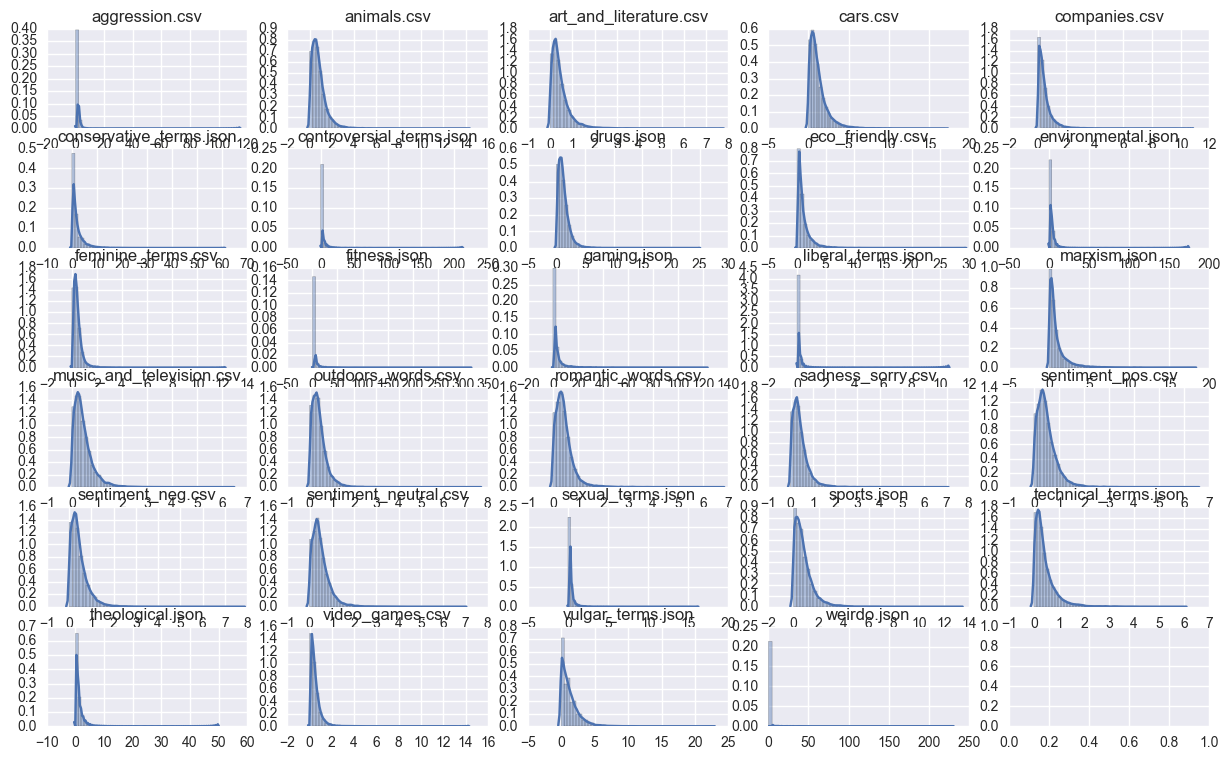

In [82]:
# We'll begin by creating a list of all points for each category
points=[]
for col in scaled_dfs[i].columns:
    points.append([])
    for df in scaled_dfs:
        points[-1].extend([x for x in df[col]])
plt.subplots(6,5,figsize=(15,9))
i=1
for category_points ,category in zip(points,scaled_dfs[0].columns):
    plt.subplot(6,5,i)
    sns.distplot(category_points)
    plt.title(category)
    i+=1
plt.show()

Clearly, there are outliers for all categories. We don't want to toss these out because they do consist of true data. Instead, we must normalize all of our data to offset these outliers.

### All of the plots are skewed normal distributions. Lets normalize the dfs now.

In [83]:
points=[]
for col in scaled_dfs[i].columns:
    points.append([])
    for df in scaled_dfs:
        points[-1].extend([float(x) for x in df[col]])
for i in range(len(points)):
    scaler=preprocessing.Normalizer()
    scaler.fit(np.array(points[i]).reshape(1,-1))
    for j in range(len(scaled_dfs)):
        scaled_dfs[j].iloc[:,i]=preprocessing.minmax_scale(scaler.transform(scaled_dfs[j].iloc[:,i].reshape(1,-1))[0])

/Users/thomas/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


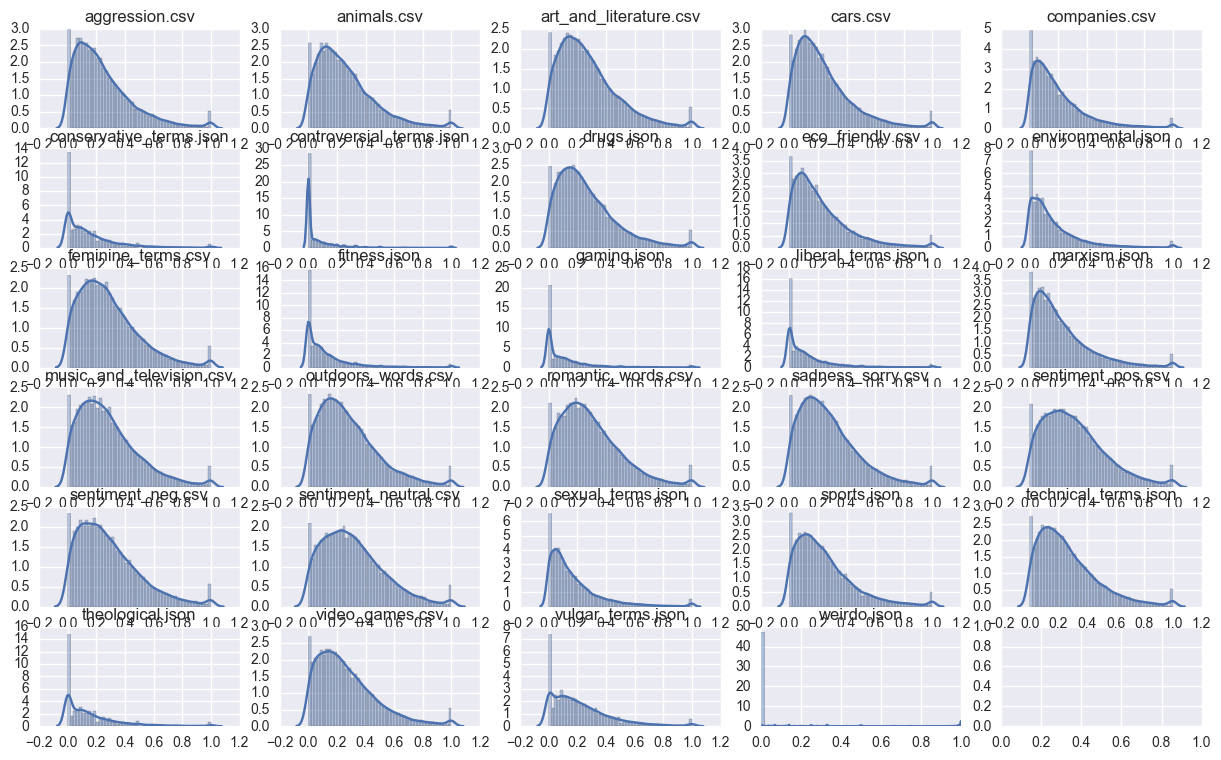

In [84]:
# Let's replot our df's with our newly scaled data
points=[]
for col in scaled_dfs[i].columns:
    points.append([])
    for df in scaled_dfs:
        points[-1].extend([x for x in df[col]])
        
plt.subplots(6,5,figsize=(15,9))
i=1
for category_points ,category in zip(points,scaled_dfs[0].columns):
    plt.subplot(6,5,i)
    sns.distplot(category_points)
    plt.title(category)
    i+=1
plt.show()

#### We can go a step further and log normalize this data too!

In [85]:
points=[]
for col in scaled_dfs[i].columns:
    points.append([])
    for df in scaled_dfs:
        points[-1].extend([float(x) for x in df[col]])
for i in range(len(points)):
    scaler=preprocessing.Normalizer()
    scaler.fit(np.array(points[i]).reshape(1,-1))
    for j in range(len(scaled_dfs)):
        scaled_dfs[j].iloc[:,i]=preprocessing.minmax_scale(np.log(.43+scaled_dfs[j].iloc[:,i].reshape(1, -1))[0])

/Users/thomas/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


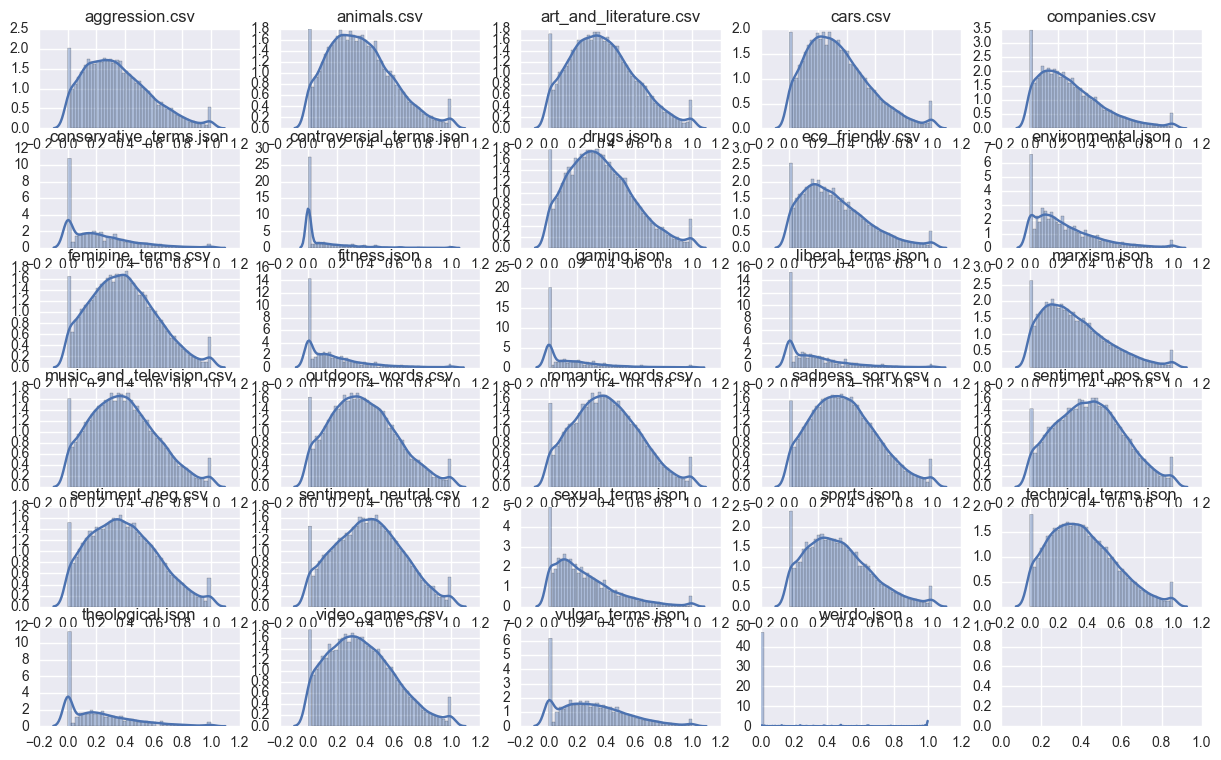

In [86]:
# Let's replot our df's with our newly scaled data
points=[]
for col in scaled_dfs[i].columns:
    points.append([])
    for df in scaled_dfs:
        points[-1].extend([x for x in df[col]])
        
plt.subplots(6,5,figsize=(15,9))
i=1
for category_points ,category in zip(points,scaled_dfs[0].columns):
    plt.subplot(6,5,i)
    sns.distplot(category_points)
    plt.title(category)
    i+=1
plt.show()

### Function for coloring correlation dataframes

In [87]:
def color(x):
    color="grey"
    x=np.abs(x)
#     if x>0.4:
#         color="Green"
    if x>0.65:
        color="white"
    if x>0.80:
        color='yellow'
    if x==1.0:
        color='black'
    if x<0.:
        color='black'
    return 'background-color: %s' %color

#### Let's check the correlation of our data

In [91]:
subreddit_means=[]
for df in scaled_dfs:
    subreddit_means.append([])
    for col in df.columns:
        subreddit_means[-1].append(np.mean(df[col]))
temp_df=pd.DataFrame(subreddit_means,columns=category_lists2,index=subreddit_list)
temp1=temp_df.corr()
# temp1=temp1-.5
temp1.style.applymap(color)

# Functions for Clustering

### Function for Showing Most Similar Subreddits

In [92]:
def distance_calculator(subreddit,frame):
    base_dist=frame.loc[subreddit,:]
    base_dist=base_dist[:-1]
    names=frame.index
    distances=[]
    for row in range(len(frame)):
        loc=frame.iloc[row,:-1]
        distances.append(np.sum((base_dist-loc)**2))
    points=zip(names,distances)
    points.sort(key=(lambda x:x[1]))
    return points[1:11]

### Take in a list of subreddits and output a recommendation

In [163]:
def recommender(list_thing,subreddit_pos):
    positions=[]
    for thing in list_thing:
        if thing in subreddit_pos.index:
            positions.append(subreddit_pos.loc[thing,:])
            positions[-1]=positions[-1][:-1]
    avg_pos=[]
    for col in range(len(positions[0])):
        mean_col=[]
        for row in range(len(positions)):
            mean_col.append(positions[row][col])
        avg_pos.append(np.mean(mean_col))
    
    names=subreddit_pos.index
    distances=[]
    for row in range(len(subreddit_pos)):
        loc=subreddit_pos.iloc[row,:-1]
        distances.append(np.sum((avg_pos-loc)**2))
    points=zip(names,distances)
    points.sort(key=(lambda x:x[1]))
    return points[:10]

### Assigning Importance Weighting to each list of words

The scaled function is in essence a model that will use all of our features. We can change the weighting of each feature should we choose to use this model over the 'personality model'

In [68]:
def scaled(df_list):
    #List of Importance Levels
    ilev_1=1
    ilev_2=2
    ilev_3=3
    ilev_4=4
    ilev_5=10
    ilev_6=25

    # The ilev assignments aren't abitrarily chosen. The theory is that for extremely opposite traits, the level should
    # be increased to ensure that subreddits with opposite radical traits don't get grouped together.
    # Basically assigning higher ilev to things that aren't related at all 
    list_dict={u'aggression.csv':ilev_1, 
               u'animals.csv':ilev_1,
               u'art_and_literature.csv':ilev_1,
               u'cars.csv':ilev_1,
               u'companies.csv':ilev_1,
               u'conservative_terms.json':ilev_1,
               u'controversial_terms.json':ilev_1,
               u'drugs.json':ilev_1,
               u'eco_friendly.csv':ilev_1,
               u'environmental.json':ilev_1,
               u'feminine_terms.csv':ilev_1,
               u'fitness.json':ilev_1,
               u'gaming.json':ilev_1,
               u'liberal_terms.json':ilev_1,
               u'marxism.json':ilev_1,
               u'music_and_television.csv':ilev_1,
               u'outdoors_words.csv':ilev_1,
               u'romantic_words.csv':ilev_1,
               u'sadness_sorry.csv':ilev_1,
               u'sentiment_pos':ilev_1,
               u'sentiment_neg':ilev_1,
               u'sentiment_neutral':ilev_1,
               u'sexual_terms.json':ilev_1,
               u'sports.json':ilev_1,
               u'technical_terms.json':ilev_1,
               u'theological.json':ilev_1,
               u'video_games.csv':ilev_1,
               u'vulgar_terms.json':ilev_1,
               u'weirdo.json':ilev_1}
    new_dfs=[]
    for i in range(len(scaled_dfs)):
        new_dfs.append(scaled_dfs[i].copy())
        for value in list_dict.keys():
            new_dfs[i][value]=scaled_dfs[i][value] * list_dict[value]
    return new_dfs

The 'personalities' function is like doing a smart PCA. Where PCA tends to lose data, we gain it. If we were to plot two categorical columns say conservative_words and liberal_words, we would find that both categories had a non-zero score. However, we are not concerned with finding out the individual tallies of these, but rather the combined tallies. Since these two categories 'don't mix', we subtract one from the other to create a new axis. Now, rather than worrying singularly about how conservative a subreddit is, we can find out a political orientation. In this way, we go further than just doing a smart PCA by also normalize finding out inferred information.

In [158]:
def personalities(df_list):
    personality_dfs=[]
    plev_1=.333
    plev_2=.5
    plev_3=1
    plev_4=2
    plev_5=3
    
    for df in df_list:
        df_p=pd.DataFrame()
        df_p['Technical']= plev_3* ((df['technical_terms.json']+df['sentiment_neutral.csv'])/2.-\
                                    (df['liberal_terms.json']+df['conservative_terms.json'])/2.)
        df_p['Sporty'] =   plev_3*(((df['fitness.json'])+df['sports.json'])/2.)
        df_p['Gender'] =   plev_3*((df['animals.csv']+df['feminine_terms.csv'])/2.-\
                                (df['cars.csv']+df['aggression.csv'])/2.)
#         df_p['Relaxation']=plev_3*(df['art_and_literature.csv']-(df['gaming.json']+df['video_games.csv'])/1.5)
        df_p['Outdoors']=  plev_3*((df['outdoors_words.csv']+df['environmental.json'])/2.-\
                                   (df['cars.csv']+df['aggression.csv'])/2.)
        df_p['Political']= plev_3*(df['liberal_terms.json']-df['conservative_terms.json'])
        df_p['Extremes']=  plev_3*((df['marxism.json']-df['feminine_terms.csv']))/2.
#         df_p['Ignored']    = plev_3*(df['aggression.csv']+df['vulgar_terms.json'])/2.
        df_p['Weird']=     plev_2*(df['weirdo.json']-df['drugs.json'])/2.
#         df_p['Emotions']=  plev_3*((df['sadness_sorry.csv']+df['sexual_terms.json'])/2.-df['romantic_words.csv'])
        df_p['Troll']=     plev_3*((df['controversial_terms.json']+df['vulgar_terms.json'])/2.)
        df_p['Sentiment']= plev_3*(df['sentiment_pos.csv']-df['sentiment_neg.csv'])
        df_p['Laziness'] = plev_3*((df['gaming.json']+df['video_games.csv'])/2.)
#         df_p['Neutrality']=plev_3*(df['sentiment_neutral.csv'])
#         df_p['Religious'] = plev_3*(df['companies.csv'])-(df['theological.json'])/2.
        personality_dfs.append(df_p)
    return personality_dfs

This is where we build our model. We first select whether we want to use 'personalities' or 'scaled', and then we add in a new factor that makes use of the posted link. If a subreddit really enjoy posting gifs, it will be accounted for.

In [159]:
subreddit_names=pd.read_csv('Top Subreddits.csv')
subreddit_list=['Subreddit Data/'+x[3:]+'.json' for x in subreddit_names['Reddit']]
exclude_names=pd.read_csv('ignore_subreddits.csv')
exclude_list=['Subreddit Data/'+x[3:]+'.json' for x in exclude_names['Reddit']]
subreddit_list=[x for x in subreddit_list if x not in exclude_list]

# 'personalities' or 'scaled'
df_list_to_use=personalities(scaled_dfs)

clus=25 # NUMBER OF CLUSTERS
comp=len(df_list_to_use[0].columns) # NUMBER OF PRINCIPAL COMPONENTS
link_mod=0.2

for i in range(len(df_list_to_use)):
#     for col in df_list_to_use[i].columns:
#         df_list_to_use[i].loc[:,col]=preprocessing.minmax_scale([float(x) for x in \
#                                                     df_list_to_use[i].loc[:,col]])[0]
    link_type=all_post_types[i]
    df_list_to_use[i]["jpg"]=[link_mod if x=='jpg' else 0 for x in link_type]
    df_list_to_use[i]["gif"]=[link_mod if x=='gif' else 0 for x in link_type]
    df_list_to_use[i]["com"]=[link_mod if x=='com' else 0 for x in link_type]
    df_list_to_use[i]["png"]=[link_mod if x=='png' else 0 for x in link_type]
    df_list_to_use[i]["htm"]=[link_mod if x=='htm' else 0 for x in link_type]

# Find mean of each column for each df. Put it into new df. Purpose is to start clustering.
subreddit_means=[]
for df in df_list_to_use:
    subreddit_means.append([])
    for col in df.columns:
        subreddit_means[-1].append(np.mean(df[col]))
# subreddits_transformed_model=PCA(n_components=comp).fit(subreddit_means)
# subreddits_transformed=subreddits_transformed_model.transform(subreddit_means).reshape(comp,-1)
model=cluster.KMeans(n_clusters=clus)
grouped_pred=pd.DataFrame(np.array(subreddit_means)).T
grouped_pred.columns=[x[15:-5] for x in subreddit_list]
grouped_pred=grouped_pred.T
model.fit(grouped_pred)
pred=model.predict(grouped_pred)
# grouped_pred=pd.DataFrame(temp,columns=[x[15:-5] for x in subreddit_list]).T
grouped_pred["Group"]=pred
grouped_pred=grouped_pred

In [160]:
distance_calculator('news',grouped_pred)

[('fantasyfootball', 0.05418121042318457),
 ('Economics', 0.05479745013336829),
 ('outside', 0.05757280812150288),
 ('pcgaming', 0.05767337980375069),
 ('AskWomen', 0.058109701899678116),
 ('todayilearned', 0.05839440132767705),
 ('SubredditDrama', 0.059514761694146795),
 ('TwoXChromosomes', 0.06081771011710655),
 ('politics', 0.06097873414949947),
 ('science', 0.06164504837972373)]

We can check the distribution of our personalities here. Keep in mind that the last 5 columns of subreddit_means correspond to the posted link type.

In [161]:
for i in range(len(grouped_pred['Group'].unique())):
    print "GROUP %i" %(i+1)
    for x in grouped_pred[grouped_pred['Group']==i].index:
        print x
    print

GROUP 1
Art
creepy
woahdude
wow
CrappyDesign
quityourbullshit

GROUP 2
food
dataisbeautiful
AdviceAnimals
pcmasterrace
ImGoingToHellForThis
HistoryPorn
facepalm
apple
MapPorn
trashy
TrollXChromosomes

GROUP 3
reddit.com
wallpapers
LearnUselessTalents
doctorwho
PerfectTiming
breakingbad

GROUP 4
history
europe
malefashionadvice
nfl
tattoos
FoodPorn
GlobalOffensive
MakeupAddiction
photography
whatisthisthing
offmychest
TheSilphRoad
smashbros

GROUP 5
WTF
BlackPeopleTwitter
mildlyinfuriating
TumblrInAction
rickandmorty
The_Donald
harrypotter
iamverysmart
fo4
MorbidReality

GROUP 6
EarthPorn
GetMotivated
skyrim
natureismetal

GROUP 7
baseball
humor
baconreader
dadjokes
learnprogramming
bodyweightfitness
DoesAnybodyElse
DepthHub
slowcooking
de_IAmA
AlienBlue
UnexpectedThugLife

GROUP 8
AskReddit
todayilearned
tifu
personalfinance
TwoXChromosomes
buildapc
changemyview
fantasyfootball

GROUP 9
photoshopbattles
4chan
fffffffuuuuuuuuuuuu
comics
me_irl
RoomPorn
FiftyFifty
spaceporn
AbandonedPorn

Let's check to see what one of our classmate's recommended subreddits are!

In [164]:
subs=pd.read_csv("amer's_subreddits.csv")
subs=subs['Subreddits'].values
recommender(subs,grouped_pred)

[('pcmasterrace', 0.01002099197513482),
 ('pokemongo', 0.011020168908361919),
 ('iamverysmart', 0.013291711404146906),
 ('europe', 0.014513204285415783),
 ('Music', 0.017251708442370266),
 ('trashy', 0.01777146052435576),
 ('lifehacks', 0.01796278473744859),
 ('dataisbeautiful', 0.018195022705766575),
 ('xboxone', 0.01836416125739381),
 ('firstworldanarchists', 0.018455279042838273)]

In [151]:
temp.columns

Index([u'Technical', u'Sporty', u'Gender', u'Outdoors', u'Ignored',
       u'Extremes', u'Weird', u'Emotions', u'Troll', u'Laziness', u'Religious',
       u'jpg', u'gif', u'com', u'png', u'htm'],
      dtype='object')

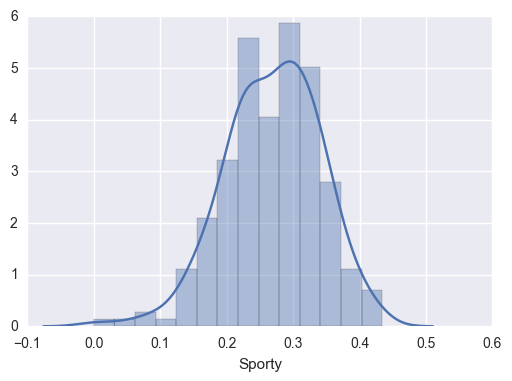

In [152]:
temp=pd.DataFrame(subreddit_means,columns=df_list_to_use[0].columns)
sns.distplot(temp['Sporty'])
plt.show()

Our explained variance ratio explains just how finicky the model is. One small change in an axis can lose a lot of inforamtion!

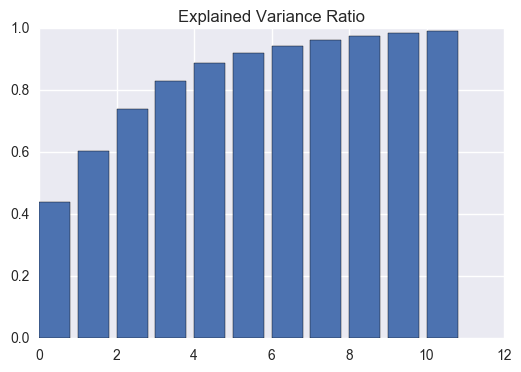

In [153]:
digits=np.cumsum(subreddits_transformed_model.explained_variance_ratio_)
plt.bar(range(len(digits)),digits)
plt.title('Explained Variance Ratio')
plt.show()

With the explained variance ratio being so difficult above, it would make sense that our cluster data can not be explained in 2 dimensions.

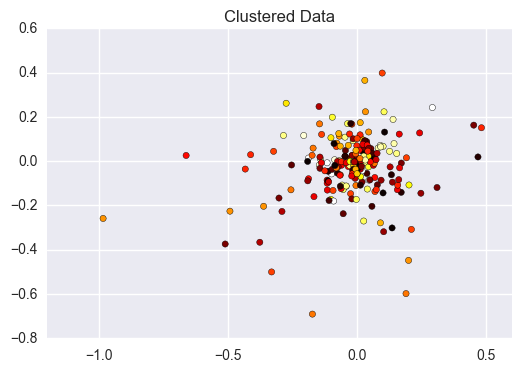

In [154]:
plt.scatter(grouped_pred[0],grouped_pred[1],c=pred,cmap='hot')
plt.title('Clustered Data')
plt.show()

We can also check to see the correlation of any feature with another here.

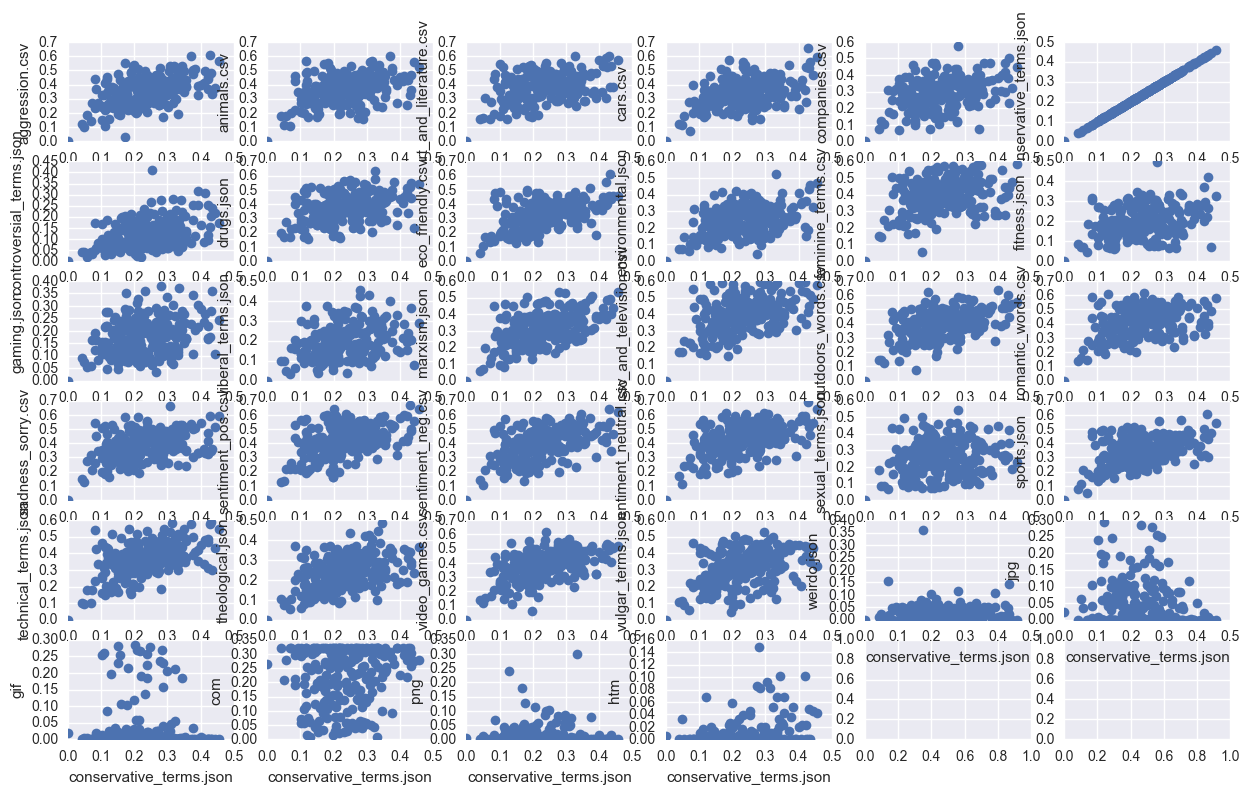

In [155]:
df_list_to_use=scaled_dfs

for i in range(len(df_list_to_use)):
    link_type=all_post_types[i]
    df_list_to_use[i]["jpg"]=[link_mod if x=='jpg' else 0 for x in link_type]
    df_list_to_use[i]["gif"]=[link_mod if x=='gif' else 0 for x in link_type]
    df_list_to_use[i]["com"]=[link_mod if x=='com' else 0 for x in link_type]
    df_list_to_use[i]["png"]=[link_mod if x=='png' else 0 for x in link_type]
    df_list_to_use[i]["htm"]=[link_mod if x=='htm' else 0 for x in link_type]

# Find mean of each column for each df. Put it into new df. Purpose is to start clustering.
subreddit_means=[]
for df in df_list_to_use:
    subreddit_means.append([])
    for col in df.columns:
        subreddit_means[-1].append(np.mean(df[col]))
        
lookup='conservative_terms.json'

temp=pd.DataFrame(subreddit_means,columns=df_list_to_use[0].columns).T
temp['Mean']=np.mean(temp)
temp=temp.T

plt.subplots(6,6,figsize=(15,9))
i=1
for col in temp.columns:
    plt.subplot(6,6,i)
    i+=1
    plt.plot(temp.loc[:,lookup],temp.loc[:,col],'o')
    plt.xlabel(lookup)
    plt.ylabel(col)
plt.show()